In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Prepare Dataset

In [2]:
dataset_path = './Text_PreprocessingV2_Merged_Dataset.csv'

In [3]:
df = pd.read_csv(dataset_path, sep=',', header=None, skiprows=1)

# test_df.columns = ['text', 'label']
df.columns = ["label", "tweet_tokens_stemmed"]

In [4]:
df.head(10)

,label,tweet_tokens_stemmed
0,2,"['warung', 'milik', 'usaha', 'pabrik', 'puluh'..."
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,1,"['duh', 'mahasiswa', 'sombong', 'kasih', 'kart..."
5,2,"['makan', 'agam', 'harga', 'makan', 'food', 's..."
6,1,"['pakai', 'kartu', 'kredit', 'baca', 'untung',..."
7,2,"['unik', 'bagus', 'foto', 'makan', 'enak', 'pe..."
8,2,"['keluarga', 'nikmat', 'alam', 'kuliner', 'sen..."
9,2,['syukur']


In [5]:
jumlah_positives = (df['label'] == 2).sum()
print(f'Jumlah review positif: {jumlah_positives}')

jumlah_negatives = (df['label'] == 1).sum()
print(f'Jumlah review negatif: {jumlah_negatives}')

Jumlah review positif: 7151
Jumlah review negatif: 3830


## Preprocessing

In [6]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
df["tweet_join"] = df["tweet_tokens_stemmed"].apply(join_text_list)

df["tweet_join"].head()

0    warung milik usaha pabrik puluh kenal putih ba...
1    mohon ulama lurus mmbri hujjah partai diwlh su...
2    lokasi strategis jalan sumatera bandung nyaman...
3    betapa bahagia unboxing paket barang bagus tet...
4    duh mahasiswa sombong kasih kartu kuning ajar ...
Name: tweet_join, dtype: object

In [7]:
df

,label,tweet_tokens_stemmed,tweet_join
0,2,"['warung', 'milik', 'usaha', 'pabrik', 'puluh'...",warung milik usaha pabrik puluh kenal putih ba...
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',...",mohon ulama lurus mmbri hujjah partai diwlh su...
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '...",lokasi strategis jalan sumatera bandung nyaman...
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba...",betapa bahagia unboxing paket barang bagus tet...
4,1,"['duh', 'mahasiswa', 'sombong', 'kasih', 'kart...",duh mahasiswa sombong kasih kartu kuning ajar ...
...,...,...,...
12255,1,"['film', 'tncfu', 'cocok', 'tonton', 'suka', '...",film tncfu cocok tonton suka sadis
12256,1,"['indihome', 'mahal', 'bayar', 'tangan', 'lamb...",indihome mahal bayar tangan lambat
12257,1,"['be', 'dek', 'gea', 'cowok', 'cupu', 'takut',...",be dek gea cowok cupu takut pacar pacar tingga...
12258,1,"['valen', 'kualitas', 'konentator', 'didik', '...",valen kualitas konentator didik jebret jebret ...


## Split Dataset

In [8]:
## Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

X = df["tweet_join"]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TFiDF

In [9]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_features=1000, min_df=1,
                        norm='l2', ngram_range=(1,2))
X_train_tfdf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

In [10]:
len(vectorizer.get_feature_names_out()), vectorizer.get_feature_names_out()[0:20]

(1000,
 array(['ac', 'acara', 'adem', 'aduh', 'agam', 'agama', 'ahok', 'air',
        'air terjun', 'ajak', 'ajar', 'akal', 'akses', 'ala', 'alam',
        'alami', 'alas', 'alas daun', 'alat', 'alias'], dtype=object))

In [11]:
X_train_tfdf.shape

(9808, 1000)

In [12]:
# Ambil contoh kalimat dari sampel data
sample_index = 0  # Misalnya kita ambil sampel pertama
sample_sentence = X_train.iloc[sample_index]

# Transformasikan kalimat menjadi representasi TF-IDF
sample_tfidf_representation = vectorizer.transform([sample_sentence]).toarray()

print("Kalimat Asli:")
print(sample_sentence)
print("\nRepresentasi TF-IDF:")
print(sample_tfidf_representation)


Kalimat Asli:
rekomendasi makan teman menu aneka enak kecewa aneka menu khas indonesia variatif enak harga sesuai porsi lokasi area mal coba nasi tutug oncom bodo jamin tagih

Representasi TF-IDF:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.39109055 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.22222807
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.

## Build and Compile Model

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [14]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_dim=X_test_tfidf.shape[1], activation='relu'),
    # tf.keras.layers.Dense(64,  activation='relu'),
    tf.keras.layers.Dense(16,  activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')

])

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

model.summary()

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)                │     32,032 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 16)                │        528 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 3)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 32,611 (127.39 KB)

 Trainable params: 32,611 (127.39 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [15]:
# model.fit(
#         batch_generator(train_input, train_df['label'], 32),
#         epochs=5, 
#         validation_data=(valid_input, valid_df['label'],),
#        )

# Melatih model
history = model.fit(X_train_tfdf, y_train,
                    epochs=5, 
                    validation_data=(X_test_tfidf, y_test))

Epoch 1/5


307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7147 - loss: 0.6698 - val_accuracy: 0.8197 - val_loss: 0.4473
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8338 - loss: 0.4349 - val_accuracy: 0.8283 - val_loss: 0.4581
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8592 - loss: 0.3673 - val_accuracy: 0.8161 - val_loss: 0.4870
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8703 - loss: 0.3317 - val_accuracy: 0.8230 - val_loss: 0.5236
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8883 - loss: 0.2930 - val_accuracy: 0.8201 - val_loss: 0.6260


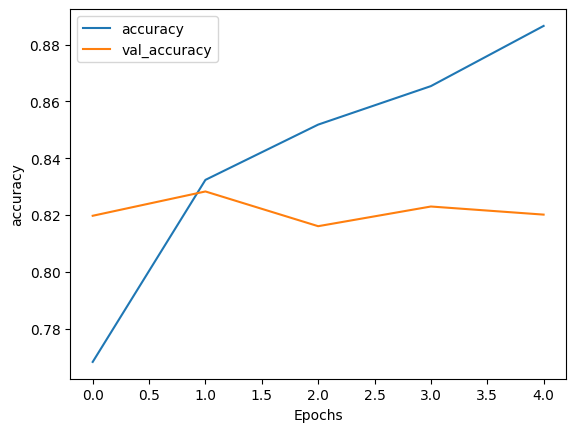

In [16]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

In [22]:
# Konversi probabilitas menjadi label sentimen
def convert_to_sentiment_label(probabilities):
    # Tentukan indeks dengan probabilitas tertinggi
    max_prob_index = np.argmax(probabilities)

    # Definisikan kelas sentimen berdasarkan indeks probabilitas tertinggi
    if max_prob_index == 0:
        return "Netral"
    elif max_prob_index == 1:
        return "Negatif"
    else:
        return "Positif"
    
# Kalimat untuk diuji
sentence = "saya percaya hidangan bakso di sini itu bersih , maka dari itu tidak masalah dengan harga di atas 10 ribu asal bersih dan tes enak . favorit saya adalah bakso super urat nya , gede , kenyal , dan enak banget . biasanya saya order bakso goreng nya juga , karena di sini juga juara loh . puas banget deh , tidak apa-apa mengantre demi bakso enak yang bersih"

# Lakukan transformasi TF-IDF pada kalimat
sentence_vectorized = vectorizer.transform([sentence]).toarray()

# Lakukan prediksi sentimen menggunakan model yang telah dilatih
prediction = model.predict(sentence_vectorized)    

# Konversi probabilitas menjadi label sentimen
sentiment_label = convert_to_sentiment_label(prediction[0])

# Tampilkan hasil prediksi
print(prediction)
print("Sentimen:", sentiment_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[2.5464698e-22 5.8014715e-13 1.0000000e+00]]
Sentimen: Positif
